# José David Jayk Vanegas

## Librerías

In [12]:
from scipy.stats import rv_continuous, triang, binom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Entradas conocidas

In [13]:
# Parámetros de la distribución de la producción
min = 4500
max = 9000
moda = 6000
c = (moda-min)/(max-min)

# Distribución de la producción defectuosa
class fraccion_defectuosa(rv_continuous):
    def _pdf(self, x):
        return 99*(1-x)**98

## Entradas inciertas

In [14]:
# Fracción defectuosa
fraccion = fraccion_defectuosa(a=0, b=1, name='fraccion_defectuosa')

def producciones():
    # Producción bruta
    produccion_bruta = triang.rvs(c=c, loc=min, scale=max-min, size=1)[0]

    # Producción defectuosa
    produccion_defectuosa = binom.rvs(int(produccion_bruta), fraccion.rvs())

    return produccion_bruta, produccion_defectuosa

## Cálculos intermedios de las entradas inciertas

In [15]:
n = 1000
produccion_neta = np.zeros(n)
produccion_defectuosa_arr = []
for i in range(n):
    produccion_bruta,produccion_defectuosa = producciones()
    produccion_defectuosa_arr.append(produccion_defectuosa)
    produccion_neta[i] = produccion_bruta - produccion_defectuosa

## Resultados

C:\Users\josed\AppData\Local\Temp\ipykernel_22936\2893004270.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


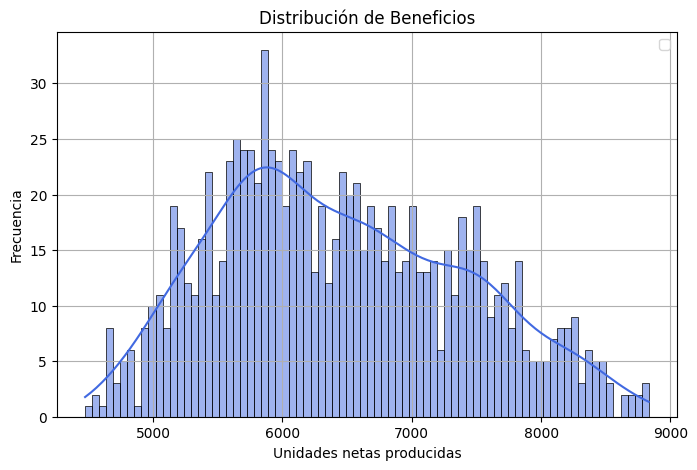

Media: 6439.295382605438
Varianza: 904786.1356175572
Sesgo: 3.737675135805977e-10
Mínimo: 4473.432054011536
Máximo: 8832.260612232714
Proporcion de dias en los que se producen mas de 150 unidades defectuosas: 9.5%


In [16]:
# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(produccion_neta, bins=80, kde=True, color="royalblue")
plt.xlabel("Unidades netas producidas")
plt.ylabel("Frecuencia")
plt.title("Distribución de Beneficios")
plt.legend()
plt.grid()
plt.show()

# Momentos
mean = np.mean(produccion_neta)
var = np.var(produccion_neta)
skew = np.mean(((produccion_neta - mean)/var)**3)
minimo = np.min(produccion_neta)
maximo = np.max(produccion_neta)

print('Media:', mean)
print('Varianza:', var)
print('Sesgo:', skew)
print('Mínimo:', minimo)
print('Máximo:', maximo)

# probabilidad de que las unidades defectuosas en un dia cualquiera sea 150 unidades
unidades_defectuosas = len(produccion_defectuosa_arr)
unidades_defectuosas_mayor_a_150 = sum([1 for i in produccion_defectuosa_arr if i > 150])
proporcion = unidades_defectuosas_mayor_a_150 / unidades_defectuosas

print(f'Proporcion de dias en los que se producen mas de 150 unidades defectuosas: {proporcion*100}%')